# Numpy Review

In this review, we are going to refresh our memories about the Numpy package. Numpy (numerical Python) is the basic engine that turns Python into a tool for data analysis. Anything "data sciency" that you do in Python will rely on Numpy at some point, either explicitly (when calling Numpy fuctions directly), or implicitly (when, e.g., using Pandas).

The point of Numpy is do make working with data in Python easier and faster. Here, we going to remind ourselves of basic Numpy functionality.

## Python lists

First, let's look at a basic Python list:

In [1]:
a_list = [2, 4, 6, 8]

---

Just to warm up, let's get some items from our list via *indexing*:

Get the first number from the list (the "zeroith" number in Pythonese):

In [2]:
a_list[0]

2

Get the last two numbers:

In [3]:
a_list[-2:]

[6, 8]

---

Now let's make a *nested* Python list:

In [4]:
a_nested_list = [[2, 4], [3, -1], [-2, 1]]

Remember that a Python list can hold data of different types, lengths, etc., but this list is special; it is a *list of lists* all of the same length.

Let's have a look:

In [5]:
print(a_nested_list)

[[2, 4], [3, -1], [-2, 1]]


How would we get the first entry in the second list? 

We could do it in two steps... first, get the second list:

In [6]:
sec_list = a_nested_list[1]

And then get the first entry:

In [7]:
my_num = sec_list[0]
print(my_num)

3


Conveniently, we can just do this in one go:

In [8]:
my_num = a_nested_list[1][0]
print(my_num)

3


This does the same thing without having to invoke the intermediate variable `sec_list`. 

While this list-of-lists construct might seem a little abstract, there is actually a nice way to wrap our heads around it, which is to think of it as a *matrix*.

> Unfortunately, no one can be told what the Matrix is. You have to see it for yourself. *- Morpheus*

Here is an example of a matrix:

![A matrix](./images/mailboxes.png)

A ***matrix*** is a 2 dimensional (2D) arrangement of things and, for our purposes, the things are data of one form or another (numbers, strings, timestamps, etc.).

These mailboxes are numbered sequentially, because there are other mailboxes in other matrices and that's just how the USPS rolls. But, notice that, for *this* matrix of mailboxes, there is another way in which we could uniquely refer to each mailbox. Specifically, we could uniquely specify each mailbox by the *row* it is in and the *column* it is in.

For example, the open mailbox with the key in the door is in the 2nd row and the 4th column or, in terms of Python indexes, the mailbox is at location [1, 3]. 

So, we can think of matrix as an arrangement of data that has a built in ***spatial coordinate system*** used to refer to the items of data.

Here's another Python list of lists:

In [9]:
another_nested_list = [[3.3, 2.3, 2.2], [1.2, 7.8, 8.7], [4.8, 2.2, 6.5],
                       [1.5, 7.5, 9.5], [5.9, 1.6, 7.7]]

As far as Python is concerned, this is just a list that happens to contain 5 lists, each of length 3:

In [10]:
print(f'Another nested Python list: {another_nested_list}')

Another nested Python list: [[3.3, 2.3, 2.2], [1.2, 7.8, 8.7], [4.8, 2.2, 6.5], [1.5, 7.5, 9.5], [5.9, 1.6, 7.7]]


But it makes sense for our human brains to think about it as a 2D arrangement of data, like this: 

| row # | Col # | | | | |
| ---- | ---- | ---- | ---- | ---- | ---- |
|   | 0 | 1 | 2 | 3 |  4 | 5 |
| 0 | 3.3 | 1.2 | 4.8 | 1.5 |  5.9 | 9.0 |
| 1 | 2.3 | 7.8 | 2.2 | 7.5 |  1.6 | 8.1 |
| 2 | 2.2 | 8.7 | 6.5 | 9.5 |  7.7 | 5.2 |

Now we can think of the Python indexes used to access the data as spatial ***row*** and ***column*** coordinates. For example:

In [11]:
another_nested_list[2][1]

2.2

fetches the data value in the second row (row index 1) and the third column (column index 2). 

Even though, in Python terms, `another_nested_list` is just a list of lists that all happen to be of the same length, it's very helpful for us to map data like this onto a matrix and think of the indexes as coordinates.

## Numpy

Numpy is a big and powerful package, but you can think of it's most basic function as making this matrix-like way of thinking about data explicit, as opposed to just a cute way of thinking about lists of lists.

To use numpy, we first import it. Traditionally, it is imported under the name "`np`".

In [12]:
import numpy as np

Now we can convert our latest nested list into a numpy matrix using numpy's `array()` function:

In [13]:
our_numpy_matrix = np.array(another_nested_list)

Let's look at our new matrix!

In [14]:
print(our_numpy_matrix)

[[3.3 2.3 2.2]
 [1.2 7.8 8.7]
 [4.8 2.2 6.5]
 [1.5 7.5 9.5]
 [5.9 1.6 7.7]]


And compare it to the Python list from which we created it.

In [15]:
print(another_nested_list)

[[3.3, 2.3, 2.2], [1.2, 7.8, 8.7], [4.8, 2.2, 6.5], [1.5, 7.5, 9.5], [5.9, 1.6, 7.7]]


We can see that the numpy version has made the spatial row x column arrangement explicit.

Now, getting data values is easy peasy, we just index into our new matrix with row and column coordinates of a desired value:

In [16]:
our_numpy_matrix[2,0] # get the data at the third row and first column

4.8

Let's see what data type our new matrix is, according to Python:

In [17]:
type(our_numpy_matrix)

numpy.ndarray

So our new matrix is a Python object made by numpy of type "ndarray", which is short for "N-dimesional array" – we'll unpack this in a bit.

But our object contains other objects (in that Pythonic way), so let's see what they are:

In [18]:
type(our_numpy_matrix[2,0])

numpy.float64

So they are floating point numbers, also defined in numpy, that presumably have a few more bells and whistles that regular Python floats (the 64 at the end means that 64 bits are used to store each number; this is the number's *precision*.

You may have noticed that our new matrix is a little different than the way we laid out our numbers in the table above. There, we made each sub-list into a column, whereas the `array` function seems to have made each list into a row.

Fear not! Numpy objects, like all Python objects "know" how to do things; they have *methods*. The need to turn the rows into columns and vice versa is very common – it is called *transposing* a matrix – so numpy arrays have a *transpose* method `T`.

In [19]:
transposed_matrix = our_numpy_matrix.T
print(transposed_matrix)

[[3.3 1.2 4.8 1.5 5.9]
 [2.3 7.8 2.2 7.5 1.6]
 [2.2 8.7 6.5 9.5 7.7]]


Notice that the value 4.8 used to be in the third row of the first column, but now it's coordinates have been flipped:

In [20]:
transposed_matrix[0,2] # new location of 4.8

4.8

In [21]:
transposed_matrix[2,0] # value at the old location

2.2

---

In the code cell below, make a Python list of lists, create a numpy matrix from it, transpose it, and access 3 of it's values.

In [22]:
list_of_lists = [[1.0, 1.2, 1.3], [2.0, 2.2, 2.3], [3.0, 3.2, 3.3], 
                  [4.0, 4.2, 4.3], [5.8, 5.2, 5.3]]

matrix = np.array(list_of_lists)
print(matrix)
print()
transposed_matrix = matrix.T
print(transposed_matrix)
print()
print(transposed_matrix[0, 3])
print(transposed_matrix[1, 2])
print(transposed_matrix[2, 4])

[[1.  1.2 1.3]
 [2.  2.2 2.3]
 [3.  3.2 3.3]
 [4.  4.2 4.3]
 [5.8 5.2 5.3]]

[[1.  2.  3.  4.  5.8]
 [1.2 2.2 3.2 4.2 5.2]
 [1.3 2.3 3.3 4.3 5.3]]

4.0
3.2
5.3


### Numpy arrays 

So far, we've been talking about our data above as a "matrix", yet we used the `array()` function to make it, and Python tells us that our matrix is an `ndarray` – what's going on?

#### Types of arrays

"Array" is a general term for a structured collection of data, and can have any number of dimensions (hence "ndarray" for "N-dimensional array"). Here's an (empty) 3 dimensional array:

![A 3D array](images/array.png)

If this array were named "phred", we would index it just like above, but with an extra index – the coordinate specifying the location along the third dimension. So `phred[5, 5, 3]` would specify the bottom right location just peeking out on the fourth – what? – "page" of the array.

Though arrays can have any number of dimensions, lower-dimensional arrays are common and get their own special names.

A "matrix" is an array of 2 dimensions. As you already know, a matrix is a universal format for data and is preferably in "tidy" format, where each row is an observation and each column is a variable.

A "vector" is a list of numbers, so named because a simple list of numbers is used in math (linear algebra) and physics to specify vectors (such as force). Vectors can be 

* "row vectors" - a matrix with a single row
* "column vectors" - a matrix with a single column
* a list of numbers with only a single dimension, like a Python list

Finally, in this lingo, a single number is referred to as a "scaler" (because multiplying a vector by a number scales the length of the vector without changing its direction).

---

In the cell below, make a Python list or tuple containing the x and y coordinates of a point (any point you like – I'm a big fan of x=3, y=1 personally). On a piece of paper or a drawing program or whatever, plot the point in an x,y coordinate system, and draw an arrow – a vector! – from the origin to your point.

In [29]:
point = (3, 1)

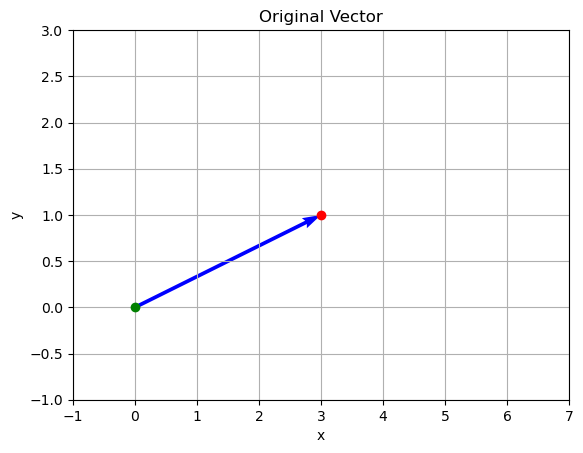

In [37]:
plt.figure()
plt.plot(0, 0, 'go')  # origin
plt.plot(point[0], point[1], 'ro')  # point
plt.quiver(0, 0, point[0], point[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b')  # vector
plt.xlim(-1, 7)
plt.ylim(-1, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Vector')
plt.grid(True)
plt.show()

Now convert your Python object into a numpy array.

In [38]:
obj_to_array = np.array(point)

Get the shape of your new vector using the `shape` method (used just like the `T` method above).

In [39]:
obj_to_array.shape

(2,)

Multiply your vector by 2 (if your vector is named "Velma", then you would literally do `Velma * 2`).

In [40]:
obj_to_array * 2

array([6, 2])

Plot your new vector and confirm that the multiplication *scaled* the original vector up by a factor of 2 without changing its direction!

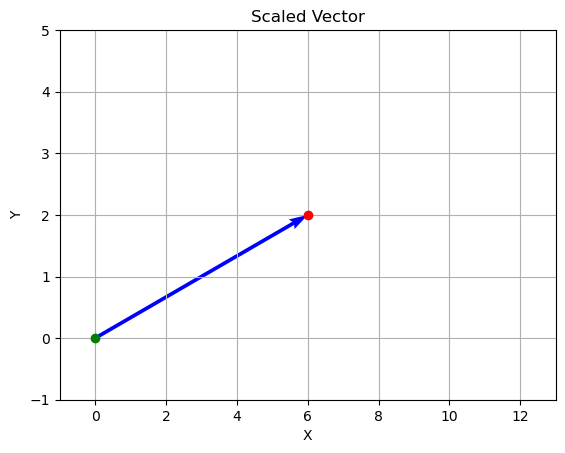

In [41]:
plt.figure()
plt.plot(0, 0, 'go')  # origin
plt.plot(scaled_vector[0], scaled_vector[1], 'ro')  # scaled point
plt.quiver(0, 0, scaled_vector[0], scaled_vector[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b')  # vector
plt.xlim(-1, 13)
plt.ylim(-1, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled Vector')
plt.grid(True)
plt.show()

---

We've just illustrated an awesome thing about numpy ndarrays: if we want to do simple operations on an entire array, we don't need to do it element-by-element, we just do it on the entire array in one go! Despite operating on arrays in general, this property is referred to as "*vectorization*" of operations.

#### Making numpy arrays 

##### arrays from lists or tuples

We've already seen that we can make numpy arrays from Python lists. Like this:

In [42]:
print(f'A python list: {a_list}')

a_numpy_thing = np.array((a_list))

print(f'A numpy thing: {a_numpy_thing}')

A python list: [2, 4, 6, 8]
A numpy thing: [2 4 6 8]


Or this:

In [43]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

---

In the cell below, confirm that you can make a numpy array from a Python tuple.

In [44]:
a_tuple = (1, 3, 5, 7, 9)

array_from_tuple = np.array(a_tuple)
array_from_tuple

array([1, 3, 5, 7, 9])

##### ones and zeros

If we're creating or reading in data from a source other than a Python list or tuple, we need a place to put it. To make new arrays to hold stuff, we first create an array filled with something. Most of the time, it doesn't matter what we fill it with. We commonly fill new arrays with ones or zeros.

In [45]:
a_vec = np.ones((3,2))
print(f'an array of ones:\n {a_vec}')

an array of ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]


---

In the cell below, make an array of zeros.

In [46]:
zero_array = np.zeros((3, 2))
zero_array

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

---

##### Any number 

We can also initialize an array to any value we want.

In [47]:
the_answer = np.full((3,3), 42)
print(f'Every cell has the answer!:\n {the_answer}')

Every cell has the answer!:
 [[42 42 42]
 [42 42 42]
 [42 42 42]]


---

In the cell below, get the same result as above (a 3x3 array of 42s) using 1) `np.ones` and 2) `np.zeros`. 
(Hint: take advantage of vectorization using `*` and `+`)

In [48]:
# np.ones
ones_array = np.ones((3, 3))

# Multiply the ones array by 42
the_answer_ones = ones_array * 42
print('np.ones:', the_answer_ones)

# np.zeros
zeros_array = np.zeros((3, 3))
the_answer_zeros = zeros_array + 42
print('\nnp.zeros:', the_answer_zeros)

np.ones: [[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]

np.zeros: [[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


##### random numbers

In data science, we often add random noise to simulations in order to capture the random variability present in the universe and the data we get from it. We can do this using any number of functions in `np.random`. For example

In [51]:
my_noise = np.random.randn(4,4)
print(f'C\'mon feel the noise! \n {my_noise}')

C'mon feel the noise! 
 [[-0.66152738 -1.21369313  0.55039828  0.6460623 ]
 [-0.83129322  1.57561069 -0.27871562 -0.69066582]
 [-1.93112377  0.51619613 -0.91231976  1.89468231]
 [-0.8818898   0.75764503 -0.1829919   0.42941186]]


Which made normally distributed (Gaussian) noise. 

We can also make noise that is uniformly distributed:

In [52]:
unif_noise = np.random.rand(4,4)
print(f'Moar noise! \n {unif_noise}')

Moar noise! 
 [[0.54817339 0.05689491 0.05670364 0.82355464]
 [0.85064108 0.02073329 0.63987486 0.18946149]
 [0.47616388 0.24368007 0.46777369 0.33292412]
 [0.10397316 0.62182816 0.18893279 0.54775564]]


Or we can make random integers:

In [53]:
int_noise = np.random.randint(1, 11, (4,4))
print(f'Random integers! \n {int_noise}')

Random integers! 
 [[10  9 10  1]
 [ 4  7 10  9]
 [ 2  9  9  9]
 [ 7  4  7  6]]


##### the identity matrix

Finally, we can make an "identity matrix", a matrix with 1s running down the diagonal. It's useful for linear algebra applications, and is included there only for completeness.

In [54]:
aye = np.eye(4,4)
print(f'Aye aye Cap\'n! \n {aye}')

Aye aye Cap'n! 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


---

In the cell below, make a 6x6 array containing random integers from -10 to 10.

In [58]:
random_array = np.random.randint(-10, 11, size=(6, 6))

print('Random array!:\n', random_array)

Random array!:
 [[  4  -3   8   8  -6  -3]
 [  8   1 -10  -5  -5   3]
 [  2 -10  -1   6   0  -9]
 [  1  -6  -7  -3   7 -10]
 [  6   9   8  10  -7   3]
 [ -9  -6   3   3  -4   3]]


#### "vectorized" operations 

As mentioned above, most of the common Python operators become *vectorized* in numpy, which means that we can to the same thing to every element of our arrays in one go.

let's add 10 to all our Gaussian random numbers from above.

In [59]:
amp_noise = my_noise + 11
amp_noise

array([[10.33847262,  9.78630687, 11.55039828, 11.6460623 ],
       [10.16870678, 12.57561069, 10.72128438, 10.30933418],
       [ 9.06887623, 11.51619613, 10.08768024, 12.89468231],
       [10.1181102 , 11.75764503, 10.8170081 , 11.42941186]])

Let's see which ones go to 11!

In [60]:
amp_noise >= 11

array([[False, False,  True,  True],
       [False,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False,  True]])

If arrays are the same size, we can do element-by-element things easily.

Which elements of the Gaussian noise are greater than the corresponding elements of the uniform noise?

In [61]:
my_noise > unif_noise

array([[False, False,  True, False],
       [False,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

Add our Gaussian and integer noise element-by-element:

In [62]:
my_noise + int_noise

array([[ 9.33847262,  7.78630687, 10.55039828,  1.6460623 ],
       [ 3.16870678,  8.57561069,  9.72128438,  8.30933418],
       [ 0.06887623,  9.51619613,  8.08768024, 10.89468231],
       [ 6.1181102 ,  4.75764503,  6.8170081 ,  6.42941186]])

Divide our identity matrix by our integer noise – everything off the main diagonal should be zero...

In [63]:
aye / int_noise

array([[0.1       , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        ],
       [0.        , 0.        , 0.        , 0.16666667]])

---

In the cell below, make a 10x5 matrix containing normally distributed random numbers with a mean of about 100 and a standard deviation of about 15 using vectorized operations.

In [64]:
mean = 100
std_dev = 15

matrix = np.random.normal(mean, std_dev, size=(10, 5))

print('Matrix with normally distributed random numbers:\n', matrix)

Matrix with normally distributed random numbers:
 [[100.38323952 101.24866817 120.47770862  90.77938744  95.58862592]
 [104.7432445   95.86185807  82.88680663  83.92438119  98.52382872]
 [ 95.20391891 106.31591777 111.19857533 119.75226474 101.71228728]
 [107.4622222   96.65450748 104.16371039  81.89341314  93.53130012]
 [ 95.76156606 102.92618215  87.94148399  88.57437331 104.18529436]
 [111.31471829  85.02723383 130.98131033  87.43276154 115.46948309]
 [144.36848003 104.43932383  83.30121181  93.46603918  70.39975469]
 [ 79.50118895 102.0179836  133.8400307  103.90090479  97.79088292]
 [102.6651375   92.14648232  89.59239865 105.4686124  116.35350373]
 [ 96.89898169  96.66928766 107.74368643 130.79085725  90.68109877]]


#### Making numpy sequences 

When computing things like functions (in the math sense), we need to start by laying down an x-axis (a working domain of the function). There are two numpy functions, `arange()` and `linspace()` that make this easy for us.

The function `arange()` allows us to specify the endpoints of our domain, and a step size (which defaults to one). We can make a sequence of the numbers one to 10 like this:

In [65]:
my_domain = np.arange(1,11)
print(f'my x axis is: \n {my_domain}')

my x axis is: 
 [ 1  2  3  4  5  6  7  8  9 10]


We can also specify a step size with a third argument. Like this:

In [66]:
my_domain = np.arange(1,11,2)
print(f'my x axis is: \n {my_domain}')

my x axis is: 
 [1 3 5 7 9]


The function `linspace()` is similar, but allows us to specify the number of numbers we need, and it figures out the step size for us. Like this:

In [67]:
my_domain = np.linspace(1,11,10)
print(f'my x axis is: \n {my_domain}')

my x axis is: 
 [ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
  7.66666667  8.77777778  9.88888889 11.        ]


If we look at the shape of the object created by either `arange()` or `linspace()`, we see that they are 1D:

In [68]:
my_domain.shape

(10,)

Note that there is only one dimension, so we only need a single index to access a value:

In [69]:
my_domain[3]

4.333333333333334

We can turn this into either a row vector or a column vector by adding a second dimension. Adding a new dimension will make it, technically, a matrix – a matrix with only one column or one row, respectively.

In [70]:
my_domain_row = my_domain[np.newaxis,:]
print(f'my x axis row vector is: \n {my_domain_row}')

my x axis row vector is: 
 [[ 1.          2.11111111  3.22222222  4.33333333  5.44444444  6.55555556
   7.66666667  8.77777778  9.88888889 11.        ]]


This looks the same, but let's check its shape:

In [71]:
my_domain_row.shape

(1, 10)

So now it has 1 row and 10 columns. We therefore use a row *and* a column index to get a value.

In [72]:
my_domain_row[0, 3]

4.333333333333334

---

In the cell below, make a column vector out of `my_domain`, check the shape, and get the third entry.

In [73]:
# define domain using np.arange()
my_domain = np.arange(1, 11)

# convert 1D array to column vector
my_domain_column = my_domain[:, np.newaxis]

# check shape of column vector
print('Shape of column vector:', my_domain_column.shape)

# get third entry of column vector
third_entry = my_domain_column[2, 0]
print('Third entry of column vector:', third_entry)

Shape of column vector: (10, 1)
Third entry of column vector: 3


#### Indexing cells 

Cells and subsets of numpy arrays are accessed – "indexed" – much like Python lists and tuples are.

We've already done a fair amount of indexing, but let's get a bit more flexible. 

#### Indexing rows and columns

We can fetch entire rows or columns using the the colon, `:`. Let's try this on our `my_noise` array. First, let's look at it again:

In [74]:
print(my_noise)

[[-0.66152738 -1.21369313  0.55039828  0.6460623 ]
 [-0.83129322  1.57561069 -0.27871562 -0.69066582]
 [-1.93112377  0.51619613 -0.91231976  1.89468231]
 [-0.8818898   0.75764503 -0.1829919   0.42941186]]


Now let's get the first column:

In [75]:
my_noise[:,0]

array([-0.66152738, -0.83129322, -1.93112377, -0.8818898 ])

The colon means "everything on this dimension", so the above command means "get all the rows in the first column of `my_noise`.

---

In the cell below, get the second (index = 1) row of data.

In [76]:
second_row = my_noise[1, :]
second_row

array([-0.83129322,  1.57561069, -0.27871562, -0.69066582])

Now check the shape in the cell below.

In [77]:
second_row.shape

(4,)

Now get the first row and check the shape:

In [78]:
first_row = my_noise[0:1, :]
first_row

array([[-0.66152738, -1.21369313,  0.55039828,  0.6460623 ]])

In [79]:
first_row.shape

(1, 4)

Our output in both cases above is a 1D vector. So what do we do if we want to grab a column, say, preserve it as a column? Easy! We just specify a starting and stopping index. Like this:

In [80]:
my_noise[:,0:1]

array([[-0.66152738],
       [-0.83129322],
       [-1.93112377],
       [-0.8818898 ]])

You can see from the output that this is a column, but check its shape in the cell below to be sure:

In [81]:
my_noise.shape

(4, 4)

#### Indexing subsets ("slicing")

What we have started doing above is called "slicing", which is carving out ("slicing") subsets of data from an array.

The key to slicing is the colon, `:`, operator. 

Let's play with a 1D vector, `my_domain` first. Let's remind ourselves of it:

In [82]:
print(my_domain)

[ 1  2  3  4  5  6  7  8  9 10]


If we put a number on either side, we can read as "from the first index to the second index":

In [83]:
my_domain[1:4]

array([2, 3, 4])

If we just put an index on the left, we can read it as "from the index to the end". Like this:

In [84]:
my_domain[2:]

array([ 3,  4,  5,  6,  7,  8,  9, 10])

If we just put an index on the right, we can read it as "from the beginning to the index". Like this:

In [85]:
my_domain[:2]

array([1, 2])

---

In the cell below, slice out the 3rd through 5th values of `my_domain`.

In [86]:
sliced_values = my_domain[2:5]
sliced_values

array([3, 4, 5])

---

The extension of slicing to a matrix is straightforward. You just do your slicing on each dimension separately.

Here are some examples of array indexing from Python for Data Analysis by Wes McKinney:

![Array Indexing](images/arrayIndexing.png)

---

In the cell below, try some of these slices on `my_noise`.

In [87]:
print('First column:', my_noise[:, 0])
print('Last row:', my_noise[-1, :])
print('Submatrix:', my_noise[1:4, 2:5])

First column: [-0.66152738 -0.83129322 -1.93112377 -0.8818898 ]
Last row: [-0.8818898   0.75764503 -0.1829919   0.42941186]
Submatrix: [[-0.27871562 -0.69066582]
 [-0.91231976  1.89468231]
 [-0.1829919   0.42941186]]


#### Summaries of a matrix

A numpy matrix has many methods to compute things about itself, like the sum or mean of its values.

Here's the sum of all the elements of my_noise:

In [88]:
my_noise.sum()

-1.214213819003644

Here's the arithmetic mean:

In [89]:
my_noise.mean()

-0.07588836368772775

In the cell below, try `mean(0)` and `mean(1)` – what do these do?

In [91]:
mean_axis_0 = my_noise.mean(axis = 0)
mean_axis_1 = my_noise.mean(axis = 1)

print(mean_axis_0)
print(mean_axis_1)

[-1.07645854  0.40893968 -0.20590725  0.56987266]
[-0.16968999 -0.05626599 -0.10814127  0.0305438 ]


Describe what these do here (edit this cell).

_mean(0) calculates the mean values along the columns of the matrix, while mean(1) computes the mean values along the rows_

 In the cell below, do a dir(my_noise):

In [92]:
dir(my_noise)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

Now, in the cell below, see if you can use a method of `my_noise` to round all the numbers to the nearest integer:

In [93]:
np.round(my_noise)

array([[-1., -1.,  1.,  1.],
       [-1.,  2., -0., -1.],
       [-2.,  1., -1.,  2.],
       [-1.,  1., -0.,  0.]])